In [3]:
import simpy
import numpy as np

In [4]:
# !pip install simpy

In [5]:
def gen_interarrival(i):
    inter_arrival=np.random.exponential(1./3.0)
    print("Inter-arrival time for customer {} is {}".format(i,inter_arrival))
    return inter_arrival

In [6]:
def gen_service(i):
    service_time = np.random.exponential(1./4.0)
    print("The service time for customer {} is {}".format(i,service_time))
    return service_time 

In [7]:
def cafe_run(env,servers):
    i=0
    while True:
        i+=1
        print("Value of i is",i)
        yield env.timeout(gen_interarrival(i))             
        env.process(customer(env,servers,i))
        print(env.active_process)
        print("Checking")


In [8]:
waiting = []
def customer(env,servers,i):
    t_arrival = env.now
    print("Customer {} has arrived at {}".format(i,env.now) )
    with servers.request() as request:         
        yield request
        print(env.active_process)
        print("Customer {} has started getting service at {}".format(i,env.now))
        yield env.timeout(gen_service(i))
        t_departure = env.now
        print("Customer {} has departed at {}".format(i,env.now))
        waiting.append(t_departure-t_arrival)
        
        
    

In [9]:
obs_time=[]
queue_length=[]
def observe_process(env,servers):
    while True:
        obs_time.append(env.now)
        queue_length.append(len(servers.queue))
        yield env.timeout(2)


In [10]:
env=simpy.Environment()
servers = simpy.Resource(env,capacity=1)
env.process(cafe_run(env,servers))
env.process(observe_process(env,servers))
env.run(until=30)


Value of i is 1
Inter-arrival time for customer 1 is 0.49192088977513726
<Process(cafe_run) object at 0x7fa787075160>
Checking
Value of i is 2
Inter-arrival time for customer 2 is 0.22590931345165827
Customer 1 has arrived at 0.49192088977513726
<Process(customer) object at 0x7fa7870754f0>
Customer 1 has started getting service at 0.49192088977513726
The service time for customer 1 is 0.4658137501335052
<Process(cafe_run) object at 0x7fa787075160>
Checking
Value of i is 3
Inter-arrival time for customer 3 is 0.0726729661258705
Customer 2 has arrived at 0.7178302032267956
<Process(cafe_run) object at 0x7fa787075160>
Checking
Value of i is 4
Inter-arrival time for customer 4 is 0.1954310023167316
Customer 3 has arrived at 0.7905031693526661
Customer 1 has departed at 0.9577346399086424
<Process(customer) object at 0x7fa787075a60>
Customer 2 has started getting service at 0.9577346399086424
The service time for customer 2 is 0.25561915062897783
<Process(cafe_run) object at 0x7fa787075160>

In [11]:
waiting

[0.4658137501335051,
 0.4955235873108246,
 0.789528563580083,
 0.9252158893909286,
 0.7883425763784397,
 0.5498660591184263,
 0.6099006627924666,
 0.6492975286733633,
 0.8388592156889401,
 0.7012762040647837,
 0.8753302564427181,
 0.7909715150186938,
 0.559197015011514,
 0.5770238043793863,
 0.9823713931939531,
 1.1073300726650173,
 1.2645403855476207,
 1.658677029493167,
 1.5044440998663307,
 0.9948853990339956,
 1.0797444784521995,
 1.676224645863357,
 1.8340920019990525,
 2.157976459070337,
 2.2102475527296557,
 1.929579400596861,
 1.9495056445767185,
 1.9439556652386196,
 1.952093201428048,
 1.324966600649387,
 1.676532498152545,
 1.6419529185162256,
 1.6351541761940833,
 2.3162169911524257,
 2.025945794355625,
 2.0617957780640728,
 1.73257914479629,
 1.79890699358908,
 1.8013525574786922,
 1.487269321151464,
 1.30325055320308,
 1.3223644034069473,
 1.2683602281793949,
 0.846466659862319,
 1.4239340023595943,
 1.5480245390517826,
 1.4649938398069686,
 1.3087696781803704,
 0.9870008

Text(0, 0.5, 'Number of customers')

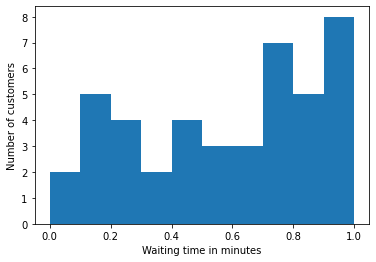

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(waiting,10,[0,1])

plt.xlabel("Waiting time in minutes")
plt.ylabel("Number of customers")

In [13]:
queue_length

[0, 2, 3, 8, 6, 3, 3, 0, 6, 2, 6, 1, 2, 0, 0]

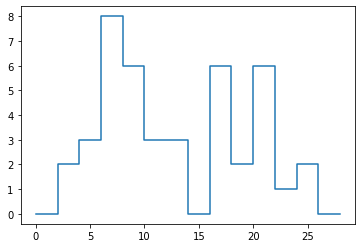

In [14]:
plt.figure()
plt.step(obs_time,queue_length,where='post')

In [15]:
obs_time

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]